In [1]:
#import python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
#import scipy as sp
from scipy.signal import find_peaks
import peakutils

In [2]:
#assign filename variable
#example input: 2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv
filename = input("Input filename:" )
#assign variable for excel reference file
ref_filename = "./Myometrial Contractility Reference.txt"
#assign variable for comments file
comments_filename = filename[0:-4] + "_comments" + ".txt"

Input filename:2018_09_21_Myometrial_Contractility_Study_11_MB_1_8.tsv


In [3]:
#import data from excel reference file
#import muscle bath tsv file (as pandas dataframe?)
#import corresponding comments file
df_file = pd.read_csv(filename, sep='\t')
df_ref = pd.read_csv(ref_filename, sep='\t')
comments_file = open(comments_filename,'r')
df_ref.head()

,Filename,Study,Patient,Bath Number,Patient Status,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,1,1,1,NaN,1.0,0.1,Adiponectin,100.0,21.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,1,2,NaN,0.0,0.0,Adiponectin,100.0,25.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,1,3,NaN,1.0,0.1,Adiponectin,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,1,4,NaN,0.0,0.0,Adiponectin,1000.0,24.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,1,5,NaN,1.0,0.1,TNF_alpha,0.1,29.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#process comments
cment_time = []
cment_txt = []
for line in comments_file:
    line = line.rstrip()
    line = line.split(sep = '\t')
    cment_time.append(line[0])
    cment_txt.append(line[1])

In [5]:
#drop unneccessary columns
df_file = df_file.drop(columns=['Timestamp','Stimulus'])
#set experiment time as index
df_file.set_index('Experiment Time', inplace = True)
#view first 5 rows of input file
df_file.head()

,Comments,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8
Experiment Time,,,,,,,,,
0.0,NaN,6.825,3.535,5.131,2.428,9.462,2.979,-0.05828,2.582
1.0,NaN,6.820,3.527,5.136,2.433,9.459,2.991,-0.04980,2.569
2.0,NaN,6.814,3.529,5.144,2.436,9.483,2.992,-0.05404,2.582
3.0,NaN,6.816,3.532,5.129,2.430,9.477,2.997,-0.04980,2.578
4.0,NaN,6.814,3.530,5.136,2.436,9.451,2.995,-0.05616,2.577


In [6]:
df_ref
#find filename in reference dataframe
df_ref = df_ref[df_ref['Filename'] == filename]
#drop extra columns
df_ref = df_ref[df_ref.columns[0:14]]
#check to see if muscle bundle should be excluded
df_ref = df_ref[df_ref["EXCLUDE SAMPLE"] != 1]
#view processed input file
df_ref.head()

,Filename,Study,Patient,Bath Number,Patient Status,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),Width1(mm),Width2(mm),Mass (mg),EXCLUDE SAMPLE
112,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,3,NaN,0.0,0.00,Omentin,500.0,23.52,1.91,1.65,52.0,NaN
113,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,4,NaN,1.0,0.05,Control,NaN,19.15,2.12,1.39,42.0,NaN
114,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,5,NaN,0.0,0.00,Resistin,500.0,20.26,1.84,1.86,44.0,NaN
115,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,6,NaN,1.0,0.05,Resistin,500.0,19.17,1.80,1.64,28.0,NaN
117,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,8,NaN,1.0,0.05,Adiponectin,100.0,24.66,1.43,1.26,23.0,NaN


In [7]:
#reset df_ref index, starting at 0
df_ref.reset_index(drop=True)
print(type(len(df_ref)))
df_ref.set_index([pd.Index(list(range(len(df_ref))))])



<class 'int'>


,Filename,Study,Patient,Bath Number,Patient Status,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),Width1(mm),Width2(mm),Mass (mg),EXCLUDE SAMPLE
0,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,3,NaN,0.0,0.00,Omentin,500.0,23.52,1.91,1.65,52.0,NaN
1,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,4,NaN,1.0,0.05,Control,NaN,19.15,2.12,1.39,42.0,NaN
2,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,5,NaN,0.0,0.00,Resistin,500.0,20.26,1.84,1.86,44.0,NaN
3,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,6,NaN,1.0,0.05,Resistin,500.0,19.17,1.80,1.64,28.0,NaN
4,2018_09_21_Myometrial_Contractility_Study_11_M...,11,AC12,8,NaN,1.0,0.05,Adiponectin,100.0,24.66,1.43,1.26,23.0,NaN


In [8]:
#print comments with timepoints
for counter, value in enumerate(cment_time):
    print(cment_txt[counter],":",value)
#create a list of the column names where muscle bath force values are stored
Force_list = ["Force1","Force2","Force3","Force4","Force5","Force6","Force7","Force8"]
#create a placeholder list for storing arrays of force data
baseline_array_list = []
#loop through viable muscle baths in study file (df_file) and retrieve baseline force data
#send array of each muscle bath baseline force data to baseline_array_list
for bath in df_ref['Bath Number']:
    print('Muscle Bath',bath,':')
    baseline_endtime = int(input("What time does baseline end"))
    baseline_array = (df_file.loc[baseline_endtime-3599:baseline_endtime,Force_list[(bath)-1]])
    baseline_array_list.append(baseline_array)

Pitocin : 7434.4
Baseline : 11304.7
Treatment Bath 1 : 15284.1
Treatment Bath 3 : 15343.5
Treatment Bath 4 : 15368.6
Treatment Bath 5 : 15413.5
Treatment Bath 6 : 15521.4
Treatment Bath 8 : 15525.5
Muscle Bath 3 :
What time does baseline end15343
Muscle Bath 4 :
What time does baseline end15368
Muscle Bath 5 :
What time does baseline end15413
Muscle Bath 6 :
What time does baseline end15521
Muscle Bath 8 :
What time does baseline end15525


Muscle Bath 3


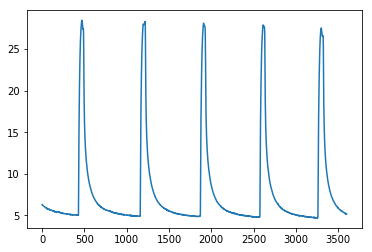

patientAC12_bath3.pdf
Muscle Bath 4


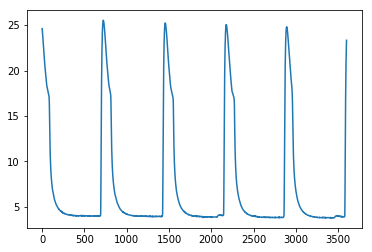

patientAC12_bath4.pdf
Muscle Bath 5


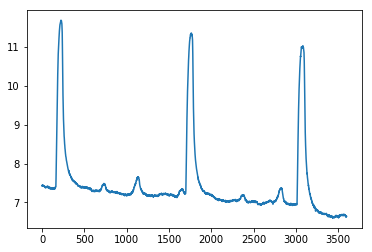

patientAC12_bath5.pdf
Muscle Bath 6


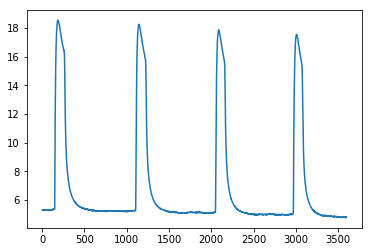

patientAC12_bath6.pdf
Muscle Bath 8


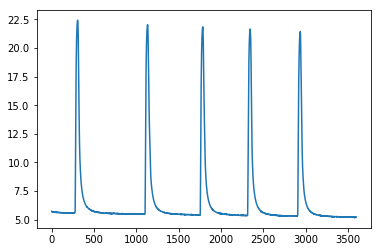

patientAC12_bath8.pdf


In [15]:
#plot the baseline contraction force data from
#for bath in df_ref['Bath Number']:
for i in range(len(baseline_array_list)):        
    
    bath = df_ref.iloc[i]["Bath Number"]
    print("Muscle Bath",bath)
    f = plt.figure()
    #plt.plot(np.array(baseline_array_list[bath-1]))
    plt.plot(np.array(baseline_array_list[i]))
    plt.show()
    #savestring = "patient"+(list(df_ref['Patient'])[bath-1])+"_"+"bath"+str(bath)+'.pdf'
    savestring = "patient"+(list(df_ref['Patient'])[i])+"_"+"bath"+str(bath)+'.pdf'
    print(savestring)
    f.savefig(savestring,sep = '')

In [33]:
#loop through baths in reference dataframe 
    #for each bath listed in the reference file, find the max/min(local extreme) for the 1 hr of baseline in the muscle bath file
    #ask when baseline ended for each bath and count backwords 1hr

#find local max values
#input the height cut off for peak analysis
locmax_list = []
fp_output_list = []
for i in range(len(baseline_array_list)):           
    bath = df_ref.iloc[i]["Bath Number"]
#for bath in df_ref['Bath Number']:
    print("Muscle Bath",bath,":")
    cutoff = float(input("input peak height cutoff:"))
    #fp_output = find_peaks(np.array(baseline_array_list[(bath-1)]),height = cutoff, width = 35)
    fp_output = find_peaks(np.array(baseline_array_list[(i)]),height = cutoff, width = 35)
    #locmax = np.array(baseline_array_list[(bath-1)])[fp_output[0]]
    locmax = np.array(baseline_array_list[(i)])[fp_output[0]]
    locmax_list.append(locmax)
    fp_output_list.append(fp_output)

Muscle Bath 3 :
input peak height cutoff:20
Muscle Bath 4 :
input peak height cutoff:20
Muscle Bath 5 :
input peak height cutoff:9
Muscle Bath 6 :
input peak height cutoff:14
Muscle Bath 8 :
input peak height cutoff:15


In [34]:
#processing find_peaks output
#assigning values from find peaks output to a list of local max indices 
locmax_indx_list = []
for i in range(len(fp_output_list)):
    locmax_indx_list.append(fp_output_list[i][0])
#assigning values from find peaks dictionary ouput to a list (to later be used with calculating duration of contractions, relaxation time, etc.)
locmax_dic_list = []
for i in range(len(fp_output_list)):
    locmax_dic_list.append(fp_output_list[i][1])

In [35]:
locmax_indx_list

[array([ 469, 1216, 1909, 2613, 3300], dtype=int64),
 array([ 723, 1456, 2177, 2892], dtype=int64),
 array([ 222, 1764, 3083], dtype=int64),
 array([ 185, 1144, 2086, 3008], dtype=int64),
 array([ 306, 1133, 1785, 2345, 2938], dtype=int64)]

Muscle Bath 3


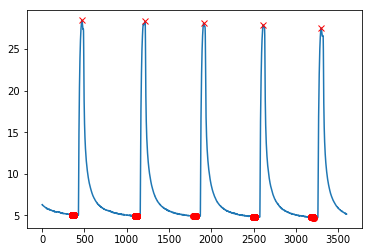

peakanalysisgraphs_patientAC12_bath3.pdf
mean baseline force: [5.04794755 4.90894306 4.88417506 4.79875389 4.74523333]
Muscle Bath 4


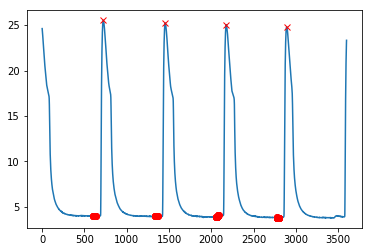

peakanalysisgraphs_patientAC12_bath4.pdf
mean baseline force: [3.97770065 3.92645615 3.92528784 3.80812643]
Muscle Bath 5


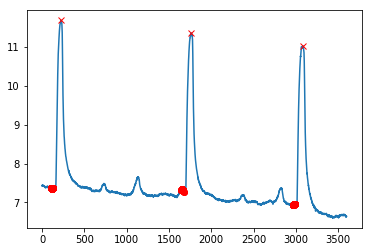

peakanalysisgraphs_patientAC12_bath5.pdf
mean baseline force: [7.36143333 7.32136667 6.94873333]
Muscle Bath 6


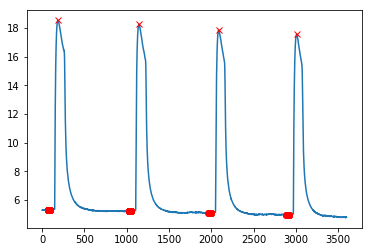

peakanalysisgraphs_patientAC12_bath6.pdf
mean baseline force: [5.30767668 5.24552144 5.09303333 4.97785938]
Muscle Bath 8


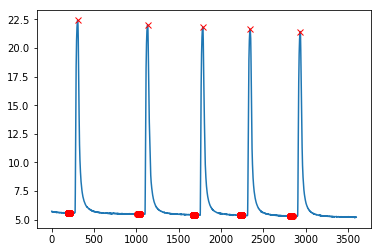

peakanalysisgraphs_patientAC12_bath8.pdf
mean baseline force: [5.57388102 5.48743333 5.42485694 5.37799986 5.33664867]


In [36]:
#find a baseline/local minima range before each peak
#create an empty list to store start indices
startlist = []
#create an empty list to store end indices
endlist = []
#create an empty list to store an arrays of baseline values
base_val_list = []
#create an empty list to temporarily store baseline means
templist = []
#create an empty list to append array of baseline means
base = []
#loop through muscle baths
#for bath in df_ref['Bath Number']:
for x in range(len(df_ref)):
    bath = df_ref.iloc[x]["Bath Number"]
    #reset lists
    startlist = []
    endlist = []
    base_val_list = []
    templist = []
    print("Muscle Bath",bath)
    #loop through local max indices and calculate start point and end point for baseline calculation as an offset of this timepoint
    #store values in startlist and endlist
    for peak_time in locmax_indx_list[x]:
        #vary start time and peak time in order to find proper baseline local min
        #starttime = peak_time-110
        #starttime = peak_time-180
        #starttime = peak_time-90
        starttime = peak_time - 120
        #starttime = peak_time-240
        #endtime = peak_time-80
        endtime = peak_time-90
        #endtime = peak_time-60
        #endtime = peak_time-210
        #endtime = peak_time-30
        if starttime < 0:
            starttime = 0
        if endtime < 0:
            endtime = 2
        startlist.append(starttime)
        endlist.append(endtime)
    #loop through contractions, calculate baseline values, assign values to spot in base_val_list
    for i in range(len(startlist)):
        baseline_values = peakutils.baseline(np.array(baseline_array_list[x])[startlist[i]:endlist[i]])
        base_val_list.append(baseline_values)
    #plot muscle baths with local min baseline and local max values highlighted     
    f = plt.figure()

    plt.plot(np.array(baseline_array_list[x])) 
    
    
    for counter, base_data in enumerate(base_val_list):
        plt.plot(np.arange(startlist[counter],endlist[counter]),base_data,'ro')
    for counter, peak in enumerate(locmax_list[x]):
        plt.plot(locmax_indx_list[x][counter],peak,'rx')
    
    plt.show()
    
    savestring = "peakanalysisgraphs_" + "patient"+(list(df_ref['Patient'])[x])+"_"+"bath"+str(bath)+'.pdf'
    
    print(savestring)
    f.savefig(savestring,sep = '')
    
    
    
    #average local min baseline data
    for base_val in base_val_list:
        #altered code to calculate the minimum value of baseline instead of average*******
        templist.append(base_val.mean())
        #templist.append(base_val.min())
        base_mean_array = np.array(templist)
    print("mean baseline force:",base_mean_array)
    #store local min baseline data in list
    base.append(base_mean_array)

In [30]:
#calculate baseline peak forces
for x in range(len(locmax_list)):
    bath = df_ref.iloc[x]["Bath Number"]
    print ("bath",bath," force (g)",sep='')
    for i in range(len(locmax_list[x])):
        print(locmax_list[x][i]-base[x][i])

bath3 force (g)
23.432052454664454
23.421056942850466
23.235824942750327
23.11124610989061
22.794766666666664
bath4 force (g)
21.562299345718728
21.31354385036694
21.124712155975192
21.01187356790361
bath5 force (g)
4.328566666666656
4.038633333333336
4.081266666666686
bath6 force (g)
13.242323315912422
13.014478562390424
12.796966666666666
12.582140622496091
bath8 force (g)
16.846118979557964
16.542566666666673
16.41514305612358
16.272000140550407
16.09335133408614


In [27]:
#calculate CSA
CSA_list = []
for bath in df_ref['Bath Number']:
    length = float(df_ref[df_ref['Bath Number']== bath]['Length (mm)'])
    mass = float(df_ref[df_ref['Bath Number']== bath]['Mass (mg)'])
    CSA = (length *1.056)/mass
    CSA_list.append(CSA)
#for i in range(len(CSA_list)):
#    print("Muscle Bath", i + 1)
#    print(CSA_list[i])

In [32]:
#calculate CSA normalized baseline peak forces
for x in range(len(locmax_list)):
    bath = df_ref.iloc[x]["Bath Number"]
    print ("bath",bath," norm (g/CSA)", sep = '')
    for i in range(len(locmax_list[x])):
        print((locmax_list[x][i]-base[x][i])/CSA_list[x])

bath3 norm (g/CSA)
49.05829370082165
49.03527305211812
48.64746383731354
48.38664054907782
47.72404637359993
bath4 norm (g/CSA)
44.78284340731993
44.266201920415554
43.874016464463075
43.63966145719359
bath5 norm (g/CSA)
8.902119666556958
8.305843479214658
8.393523088735368
bath6 norm (g/CSA)
18.31623417496304
18.00108873095844
17.70023526870162
17.40309676528047
bath8 norm (g/CSA)
14.87889603646844
14.610791358434307
14.498247771619875
14.371820517855692
14.214033610280927


In [29]:
CSA_force = []

for mb in range(len(locmax_list)):
    temps_list = []
    #print ("MUSCLE BATH",mb+1)
    for i in range(len(locmax_list[mb])):
        temps_list.append((locmax_list[mb][i]-base[mb][i])/CSA_list[mb])
    CSA_force.append(np.array(temps_list))
counter = 0    
for bath in df_ref['Bath Number']:
#for forces in CSA_force:
    print ("bath",bath," mean\n",CSA_force[counter].mean(),'\n',"bath",bath," std\n",CSA_force[counter].std(),'\n',sep = '')
    counter+=1

bath3 mean
48.57034350258622
bath3 std
0.49196911156545775

bath4 mean
44.14068081234804
bath4 std
0.4330873513576168

bath5 mean
8.533828744835661
bath5 std
0.2628695249842498

bath6 mean
17.855163734975893
bath6 std
0.3399439033995715

bath8 mean
14.514757858931848
bath8 std
0.2249256701890608



In [44]:

#print(peak_list[0])
#print(peak_list[0].mean())
#print(peak_list[0].std())

#print(peak_idx_list[0][0])
    


In [45]:
#find the baseline force/minimum value before each peak

#x = argrelextrema(np.array(baseline_array_list[0]), np.less,order=100)
#print(np.array(baseline_array_list[0])[x])
#print(x)
#print(peak_idx_list[0][0])
#np.amin(np.array(baseline_array_list[0][0:500]))
#print(np.array(baseline_array_list[0])[0:500])



#baseline_values = peakutils.baseline(np.array(baseline_array_list[0])[500:1000])

#print(baseline_values)



In [46]:
#gradients=np.diff(np.array(baseline_array_list[0]))
#print(np.argmax(gradients))
#np.array(baseline_array_list[0])[2309]

#subtract minimum value from peak force to calculate amplitude of contraction
#calculate mean value of contraction amplitude
#calculate standard deviation
#calculate contractions amplitude corrected to CSA
#calculate mean value of contractions amplitude/CSA
#calculate standard deviation of contractions amplitude/CSA


#from max/min calculate the amplitudes/peaks
#calculate the average for each bath
#calculate the peaks 

#loop through baths and find peak forces
#input function to determine when baseline period should be

In [ ]:
#4 parameters
#1. peak force or amplitude
#2. frequency or contractions/hour
#3. duration of contractions
#4. relaxation time

In [297]:
#calculate duration/ relaxation time
peaks = find_peaks(np.array(baseline_array_list[0]),height = 10, width = 30)
print(peaks)
print(peaks[1])

(array([ 371, 1017, 1676, 2331, 3003], dtype=int64), {'peak_heights': array([22.71, 22.33, 22.73, 22.45, 22.39]), 'prominences': array([19.013, 18.67 , 19.133, 18.857, 18.8  ]), 'left_bases': array([ 104,  757, 1511, 2061, 2773], dtype=int64), 'right_bases': array([1511, 1511, 3419, 3419, 3419], dtype=int64), 'widths': array([73.36527039, 75.12037037, 75.5745694 , 76.40619883, 78.65058712]), 'width_heights': array([13.2035, 12.995 , 13.1635, 13.0215, 12.99  ]), 'left_ips': array([ 353.30035461,  998.12962963, 1657.12304965, 2312.11222222,
       2984.2189781 ]), 'right_ips': array([ 426.665625  , 1073.25      , 1732.69761905, 2388.51842105,
       3062.86956522])})
{'peak_heights': array([22.71, 22.33, 22.73, 22.45, 22.39]), 'prominences': array([19.013, 18.67 , 19.133, 18.857, 18.8  ]), 'left_bases': array([ 104,  757, 1511, 2061, 2773], dtype=int64), 'right_bases': array([1511, 1511, 3419, 3419, 3419], dtype=int64), 'widths': array([73.36527039, 75.12037037, 75.5745694 , 76.40619883,

In [302]:
peaks[1]['left_bases']

array([ 104,  757, 1511, 2061, 2773], dtype=int64)

In [47]:
comments_file.close()